<a href="https://colab.research.google.com/github/ish-war/Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🏩Hotel booking analysis 🏨**

Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions! This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. Explore and analyse the data to discover important factors that govern the bookings.



#**Objective 👽**
This EDA capstone project aims to extract meaningful insights from hotel booking data to improve decision-making in the hospitality industry. We will analyze booking trends, cancellations, pricing strategies, and customer preferences to provide actionable recommendations for optimizing occupancy rates, revenue, and customer satisfaction. 😀

# **Methodology 🙂**

In this project, We used Python's most useful libraries like Pandas, Matplotlib, Seaborn etc. to examine, cleaning and to analyse the “Hotel Booking Analysis” dataset

In [5]:
# first step - let's import necessary tools/libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# let's upload the dataset
from google.colab import files
uploaded = files.upload()

Saving Hotel Bookings.csv to Hotel Bookings.csv


In [3]:
# load the csv file
df = pd.read_csv(r'/content/Hotel Bookings.csv')

In [6]:
# before cleaning the data total number of rows and columns in data
print(f"We have total {df.shape[0]} rows and {df.shape[1]} columns")

We have total 119390 rows and 32 columns


## **let's take a look at some rows and columns in the given dataset ✅**

In [7]:
# checking first 5 rows of data
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [9]:
# checking last 5 rows of data
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


## **Dataset**
This dataset contains information on records for client stays at hotels. More specifically, it contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the guest arecoming for first time, number of days in waiting list, among other things. For the purpose of this post, We only focused on some of these variables to examine.


In [10]:
# checking the basic information of given dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

✅ the .info() method provided by panda gives us information about the data types of each column, number of non-null values, and memory usage. ✅

In [11]:
# Investigating the summary statistics to understand the data's distribution.
# here we are rounding the decimal value at 2 for better understanding
df.describe(include = 'all').round(2)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.00,119390.00,119390.00,119390,119390.00,119390.00,119390.00,119390.00,119390.00,...,119390,103050.00,6797.00,119390.00,119390,119390.00,119390.00,119390.00,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.37,104.01,2016.16,NaN,27.17,15.80,0.93,2.50,1.86,...,NaN,86.69,189.27,2.32,NaN,101.83,0.06,0.57,NaN,NaN
std,NaN,0.48,106.86,0.71,NaN,13.61,8.78,1.00,1.91,0.58,...,NaN,110.77,131.66,17.59,NaN,50.54,0.25,0.79,NaN,NaN
min,NaN,0.00,0.00,2015.00,NaN,1.00,1.00,0.00,0.00,0.00,...,NaN,1.00,6.00,0.00,NaN,-6.38,0.00,0.00,NaN,NaN
25%,NaN,0.00,18.00,2016.00,NaN,16.00,8.00,0.00,1.00,2.00,...,NaN,9.00,62.00,0.00,NaN,69.29,0.00,0.00,NaN,NaN
50%,NaN,0.00,69.00,2016.00,NaN,28.00,16.00,1.00,2.00,2.00,...,NaN,14.00,179.00,0.00,NaN,94.58,0.00,0.00,NaN,NaN
75%,NaN,1.00,160.00,2017.00,NaN,38.00,23.00,2.00,3.00,2.00,...,NaN,229.00,270.00,0.00,NaN,126.00,0.00,1.00,NaN,NaN


Here, we see 32 columns in the dataframe and some columns like 'adults', 'babies', 'agent' have null values. ✅

## Variables Description



*  Hotel: Type of hotel(City or Resort)
*  is_cancelled: If the booking was cancelled(1) or not(0)
* lead_time: Number of days before the actual arrival of the guests
* arrival_date_year: Year of arrival date
* arrival_date_month: Month of arrival date
* arrival_date_week_number: Week number of year for arrival date
* arrival_date_day_of_month: Day of arrival date
* stays_in_weekend_nights: Number of weekend nights(Saturday or Sunday) spent at the hotel by the guests.
* stays_in_weel_nights: Number of weeknights(Monday to Friday) spent at the hotel by the guests.
* adults: Number of adults among the guests
* children: Number of children
* babies: Number of babies
* meal: Type of meal booked
* country: country of the guests
* market_segment: Designation of market segment
* distribution_channel: Name of booking distribution channel
* is_repeated_guest: If the booking was from a repeated guest(1) or not(0)
* previous_cancellation: Number of previous bookings that were cancelled by the customer prior to the current booking
* previous_bookings_not_cancelled: Number of previous bookins not cancelled by the customer prior to the current bookin
* reserved_room_type: Code from room type reserved
* assigned_room_type: Code of room type assigned
* booking_changes: Number of changes made to the booking
* deposit_type: Type of deposite made by the guest
* agent: ID of travel agent who made the booking
* comapny: ID of the company that made the booking
* days_in_waiting_list: Number of the days the booking was in the waiting list
* customer_type: Type of customer, assuming one of four categories
* adr: Average daily rate
* required_car_parking_spaces: Number of car parking spaces required bt the customer
* total_of_special_requesrs: Number of special requests made by the customer
* reservation_statuse: Reservation status(Canceled, check-out or no-show)
* reservation_status_date: Date at which the last reservation status was updated


## **Let's make copy of dataset 😍**

In [12]:
df1 = df.copy()

By creating a copy of dataframe we have advantages like -
1. to preserve original data
2. avoid unintended side effects
3. freely modify the data as per our wish

# **Let's work on columns 😍**

In [13]:
df1.columns    #  dataset columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

## let's check unique values in **columns 🙂**  

In [14]:
df1['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [15]:
df1['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [16]:
df1['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [17]:
df1['agent'].unique()   # here we can  see agent column has some null values

array([ nan, 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16., 446.,  34.,  78., 139., 252., 270.,
        47., 114., 301., 193., 182., 135., 350., 195., 352., 355., 159.,
       363., 384., 360., 331., 367.,  64., 406., 16

#**Data Cleaning 😉**
Cleaning data is crucial step before EDA as it will remove the ambigous data that can affect the outcome of EDA.

While cleaning data we will perform following steps:

1. Remove duplicate rows.
2. Handling missing values.
3. Convert columns to appropriate datatypes.
4. Adding important columns.

#**Removing duplicate values using Data Wrangling**

In [18]:
df1.shape   # original shape of dataset

(119390, 32)

In [19]:
# let's get number of duplicate rows
df1.duplicated().value_counts()

False    87396
True     31994
dtype: int64

In [20]:
# let's drop the duplicate rows
df1.drop_duplicates(inplace = True)

In [21]:
df1.shape    # shape of the dataframe after removing duplicate rows

(87396, 32)

Here, we can see that duplicates files has been removed from the dataset !!! ✅

## ***Check for null values ✅***

Here, we are checking for null values in the given dataset and sorting them in decending order so that we can easily understand which columns has how many null values !!!

In [22]:
# checking the total numbar of null values by getting there SUM
null_count = df1.isnull().sum()
null_count_sorted = null_count.sort_values(ascending = False) [:6]    #  by using SLICING we are removing other rows with zero values

print(null_count_sorted)

company               82137
agent                 12193
country                 452
children                  4
reserved_room_type        0
assigned_room_type        0
dtype: int64


Here, company and agent columns have company numbers and agent numbers as data. There may be some cases when customer didn't book hotel via any agent or via any company. So in that case values can be null under these columns.

We will replace null values by 0 in these columns ✅

In [23]:
# Null values are replaced using for loop and .fillna()

null_columns = ['company','agent','children']
for column in null_columns:
  df1[column].fillna(0, inplace = True)

In [24]:
# Null values in country column is replced by 'others' using .fillna()
df1['country'].fillna('others', inplace = True)

In [25]:
# after clearing the data total number of rows and columns in data
print(f' We have total {df1.shape[0]} rows and {df1.shape[1]} columns.')

 We have total 87396 rows and 32 columns.


### **Here, we can see that there is no any row with null value !!! 😍**

In [26]:
# Checking if all null values are removed
df1.isnull().sum().sort_values(ascending = False) [:5]

hotel                          0
is_canceled                    0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
dtype: int64

## **what do you know about dataset ? 🤔**
The given dataset is of Hotel Booking and we have to analyse and explore this dataset to discover important factors which affects the Hotel Booking. The above dataset has 119390 rows and 32 coulumns.The duplicate value count is 31994 rows and 32 columns. There are 4 columns in dataset which have missing valuse and those columns are company, agent, country and children. We have filled those missing values by using wrangling methods.

In [27]:
# List of categorical/object column
print(f"Categorical attributes are present as columns in the DataFrame: {df.select_dtypes(include=['object']).columns.tolist()}")

Categorical attributes are present as columns in the DataFrame: ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']


In [28]:
# List of numerical column
print(f"The DataFrame contains columns that hold numeric information.: {df.select_dtypes(include=['int','float']).columns.tolist()}")

The DataFrame contains columns that hold numeric information.: ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


## *There are some rows with total number of adults, children or babies equal to zero this means, there was no any booking were made. So we can remove such rows.*



In [29]:
df1[(df1['adults'] + df1['children'] + df1['babies'] ==0 )].shape

(166, 32)

let's remove rows with total number of adults, children or babies equal to zero

In [30]:
df1.drop(df1[(df1['adults'] + df1['children'] + df1['babies'] ==0 )].index, inplace = True)    # rows have been dropped

## **Adding important columns 😍**

we are adding these columns so that we can have better understanding of the dataset ✅

In [31]:
df1['total_stay'] = df1['stays_in_weekend_nights'] + df1['stays_in_week_nights']   # creating a column of total stay

In [32]:
df1['total_people'] = df1['adults'] + df1['babies'] + df1['children']    # creating column of total people

In [33]:
df1['total_bookings'] = df1['previous_cancellations'] + df1['previous_bookings_not_canceled']    # creating column of total bookings

# **The Insights we got till now 😍**

*   In the given dataframe, there were 31994 duplicate values. So those values were removed.


*   There were 4 columns which have missing values and the columns were 'company','agent','country','children'. The values from these columns are replaced by zero.

*   In dataframe we added three columns tatal_stay, total_people and total_bookings.


*  Three columns 'adults','children','babies' had valuen zero which means no booking has done here, so these columns were removed.










# **EDA - Exploratory Data Analysis**

## **Univariate Analysis**

### 1] Which are the most popular months of hotel bookings ?

In [35]:
# visualization code for the most popular months
month_counts = df1['arrival_date_month'].sort_values().value_counts()
month_counts

August       11242
July         10043
May           8344
April         7900
June          7756
March         7489
October       6921
September     6682
February      6083
December      5112
November      4973
January       4685
Name: arrival_date_month, dtype: int64

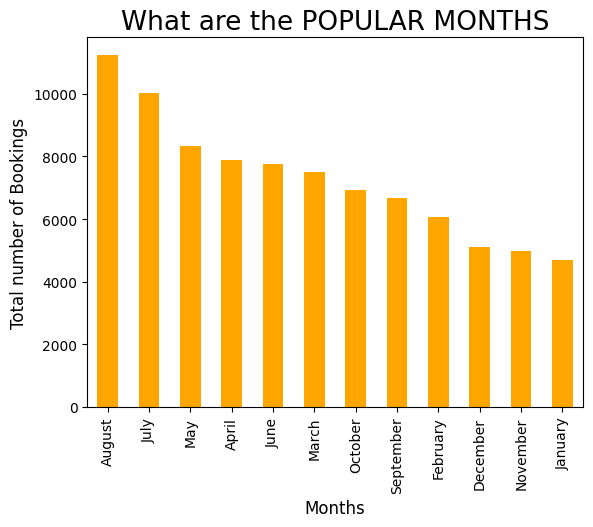

In [36]:
# we can have good insight of which are the popular months by the graph.

month_counts.plot.bar(color='orange')
plt.rcParams['figure.figsize'] = (10,5)
plt.title('What are the POPULAR MONTHS', fontsize = 19)
plt.ylabel('Total number of Bookings', fontsize = 12)
plt.xlabel( 'Months', fontsize = 12)
plt.show()

✅ As we can see that **August has highest number of bookings**(i.e. 11242) than any other month and January has the lowest bookings (i.e. 4685). May, July, and August have more bookings than average. ✅


### 2] Which type of hotel is most preferred ?

In [37]:
# visualization code
preferred_hotel = df1['hotel'].value_counts()
preferred_hotel

City Hotel      53274
Resort Hotel    33956
Name: hotel, dtype: int64

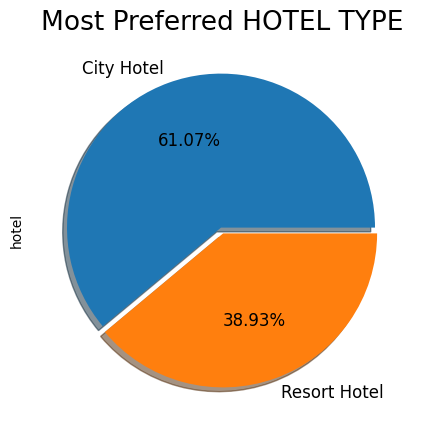

In [38]:
# visualization using pie-chart
preferred_hotel.plot.pie(explode = [0.02,0.02], autopct = '%1.2f%%', shadow = True, fontsize = 12, figsize = (10,5))
plt.title('Most Preferred HOTEL TYPE', fontsize = 19)
plt.show()

✅ From the above pie-chart we can conclude that **city hotels has the highest bookings** as compared to resort hotels.  Resort hotels **need to find reasons** behind there unpopularity and work on it. Resort hotels need to work on solutions to attract more tourists. ✅

### 3] Which agent made the most bookings?

In [39]:
#  visualization code
top_bookings_by_agent = df1['agent'].value_counts().reset_index().rename(columns={'index':'agent','agent':'num_of_bookings'})[:10]
top_bookings_by_agent

,agent,num_of_bookings
0,9.0,28721
1,240.0,13028
2,0.0,12141
3,14.0,3342
4,7.0,3294
5,250.0,2779
6,241.0,1644
7,28.0,1493
8,8.0,1383
9,1.0,1228


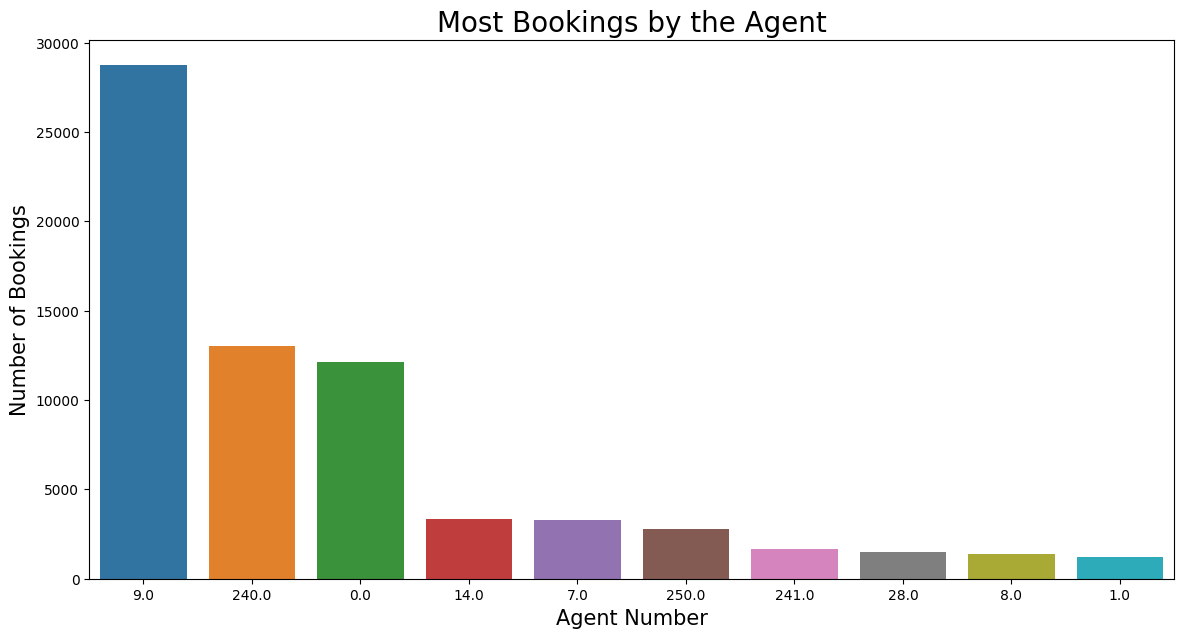

In [40]:
# barplot is used for visualization
plt.figure(figsize=(14,7))
sns.barplot(x=top_bookings_by_agent['agent'],y=top_bookings_by_agent['num_of_bookings'],order=top_bookings_by_agent['agent'])
plt.title('Most Bookings by the Agent', fontsize=20)
plt.ylabel('Number of Bookings', fontsize=15)
plt.xlabel('Agent Number', fontsize=15)
plt.show()

✅ From the above barplot we can conclude that **Agent Number 9.0** **has made highest** number of bookings (i.e. more than 25000 bookings) compared with any other agent. Agent number 1.0 and 8.0 made the less bookings than any other agent. ✅

### 4] What is the most preferred room type by the customers?

In [41]:
#  visualization code
room_type = df1['assigned_room_type'].value_counts()
room_type

A    46283
D    22419
E     7190
F     3627
G     2495
C     2160
B     1811
H      706
I      353
K      185
L        1
Name: assigned_room_type, dtype: int64

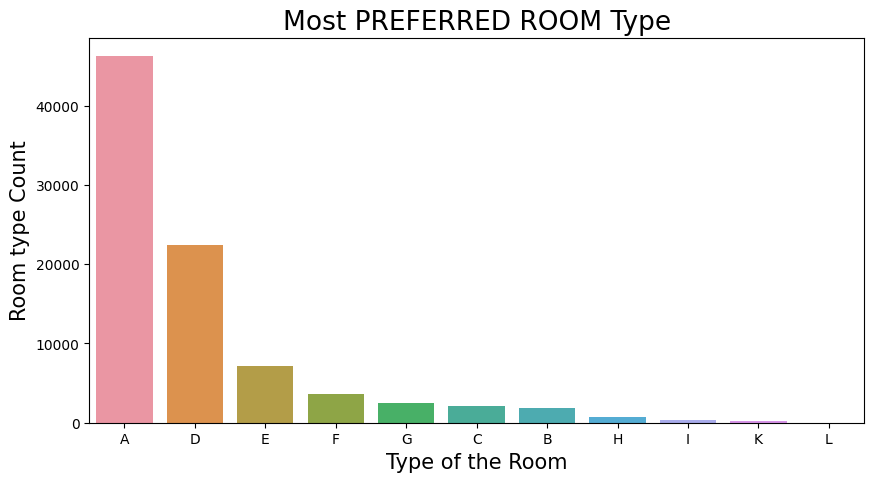

In [42]:
# countplot is used for visualization

sns.countplot(x = df1['assigned_room_type'], order = df1['assigned_room_type'].value_counts().index)
plt.title("Most PREFERRED ROOM Type", fontsize = 19)
plt.xlabel('Type of the Room', fontsize = 15)
plt.ylabel('Room type Count', fontsize = 15)
plt.show()

✅ From the above countplot we can say that room type 'A' is most preferred by the customers and the count is 46283. Also we can find that room type 'I', 'K', 'L' are the less preferred. ✅

### 5] Which year had highest bookings ?

In [43]:
# visualization code
years = df1['arrival_date_year'].value_counts().sort_index()
years

2015    13284
2016    42313
2017    31633
Name: arrival_date_year, dtype: int64

Text(0.5, 1.0, 'Year-wise Bookings')

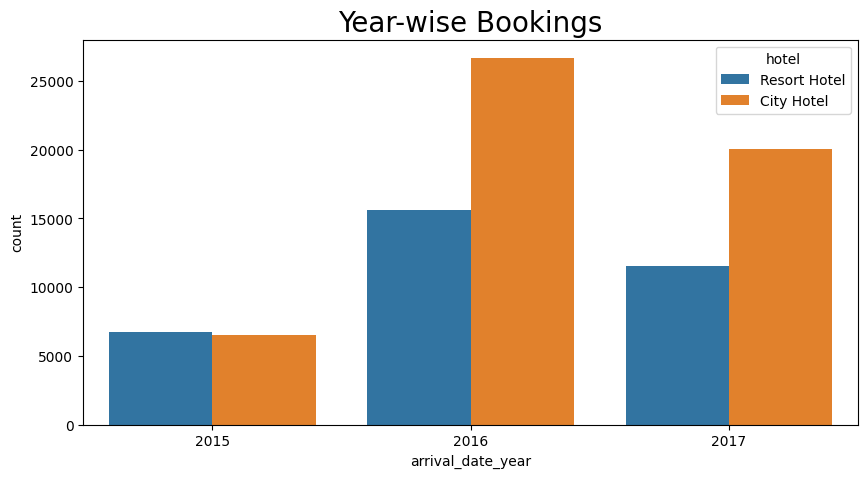

In [44]:
# visualization using countplot

sns.countplot(x = df1['arrival_date_year'], hue = df1['hotel'])
plt.title('Year-wise Bookings', fontsize = 20)

✅ As per above countplot we can say that **2016 has the highest bookings**(i.e. 42313) and 2015 has the lowest bookings(i.e. 13284). ✅